In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# read the dataset
df = pd.read_csv('dataset.csv')
df.pop("ID")
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xvar_num = X.columns
# split the dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.1, random_state=0)
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [4]:
value_counts = df['Target'].value_counts()

# Step 3: Print the results
print("Number of zeroes:", value_counts.get(0, 0))
print("Number of ones:", value_counts.get(1, 0))


Number of zeroes: 8426
Number of ones: 1283


In [5]:
from sklearn.preprocessing import LabelEncoder
#making encoders to give numbers instead of string values
new_Income_type = LabelEncoder()
new_Eduction_type = LabelEncoder()
new_Family_Status = LabelEncoder()
new_Housing_type = LabelEncoder()
new_occupation_type = LabelEncoder()

#adding them to the database
X['Income_type_n'] = new_Income_type.fit_transform(X['Income_type'])
X['Education_type_n'] = new_Income_type.fit_transform(X['Education_type'])
X['Family_Status_n'] = new_Income_type.fit_transform(X['Family_status'])
X['Housing_type_n'] = new_Income_type.fit_transform(X['Housing_type'])
X['occupation_type_n'] = new_Income_type.fit_transform(X['Occupation_type'])

In [6]:
X_n = X.drop(["Income_type",	"Education_type",	"Family_status",	"Housing_type",	"Occupation_type"], axis='columns')
X_n

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type_n,Education_type_n,Family_Status_n,Housing_type_n,occupation_type_n
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,1,4,0,2,8
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,0,4,1,1,12
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,4,4,1,1,12
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,1,1,1,1,11


In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_n, y)

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.10, random_state=16)

Linear Regression model

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
reg.coef_

array([ 1.65027848e-02, -3.18093253e-02, -2.12151156e-02, -2.23076425e-02,
       -1.04064889e-02, -1.96475245e-03, -9.57060856e-03, -3.03574787e-02,
        3.17295525e-02,  3.82438121e-03,  1.10661180e-07, -2.81045822e-03,
       -2.46916912e-03,  1.50221087e-03, -8.04312797e-04,  2.46124365e-02,
        2.97592726e-04, -3.04379181e-03])

In [12]:
reg.intercept_

0.4699837890421793

In [13]:
reg.score(X_test, y_test)

0.01985482496739943

Sigmoid Function

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression
# insitate model
model = LogisticRegression(class_weight='balanced')
# training model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
# predicting on the test data
predict = model.predict(X_test)
model.score(X_test, y_test)

0.5403321470937129

In [16]:
# visualizing the predictions
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predict)
cnf_matrix

array([[460, 374],
       [401, 451]])

In [17]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, predict, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.53      0.55      0.54       834
   with diabetes       0.55      0.53      0.54       852

        accuracy                           0.54      1686
       macro avg       0.54      0.54      0.54      1686
    weighted avg       0.54      0.54      0.54      1686



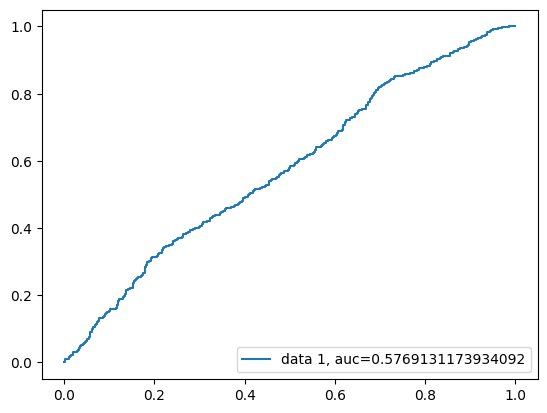

In [18]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

KNN classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
model.score(X_test, y_test)

0.797153024911032

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[535, 299],
       [ 43, 809]])

Text(58.222222222222214, 0.5, 'Truth')

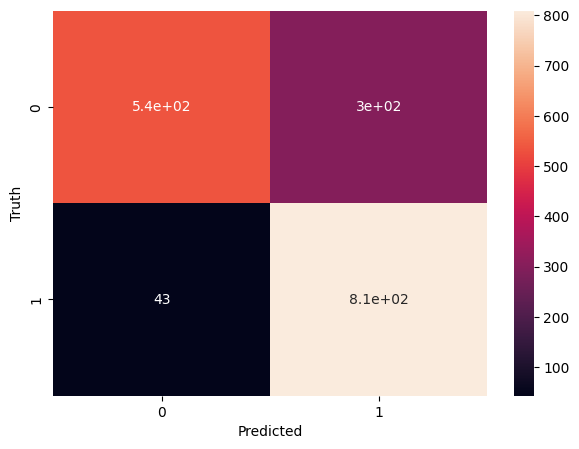

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(7, 5))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       834
           1       0.73      0.95      0.83       852

    accuracy                           0.80      1686
   macro avg       0.83      0.80      0.79      1686
weighted avg       0.83      0.80      0.79      1686



decision tree

In [24]:
from sklearn import tree

In [25]:
X_train

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type_n,Education_type_n,Family_Status_n,Housing_type_n,occupation_type_n
6023,1,0,1,0,0,0,0,0,2,7,112500.0,48.836047,0.961005,4,4,0,1,17
375,1,1,0,0,0,0,0,1,3,25,270000.0,41.213714,9.270553,4,2,1,1,10
14112,0,0,1,0,1,0,0,0,1,50,135000.0,43.560100,1.092425,0,1,2,1,8
16002,1,1,1,1,0,0,0,0,2,45,270000.0,32.019822,6.672279,4,2,1,2,8
10423,0,0,1,0,0,0,1,0,1,58,76500.0,58.665133,0.000000,1,3,2,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1,1,1,0,0,0,1,0,2,18,202500.0,59.470078,0.000000,1,1,1,1,12
581,1,0,1,1,1,0,0,0,2,44,180000.0,52.461036,9.163775,0,4,1,1,17
2169,1,0,0,1,0,0,0,1,3,25,202500.0,43.724375,3.485356,0,1,1,1,10
15598,0,0,1,0,0,0,1,0,1,55,135000.0,59.858861,0.000000,1,4,4,1,12


In [26]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predict = model.score(X_test, y_test)
predict

0.9288256227758007

In [28]:
from sklearn.metrics import confusion_matrix
predict = model.predict(X_test)
cm = confusion_matrix(y_test, predict)
cm

array([[716, 118],
       [  2, 850]])

svm algorithm

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(X_train, y_train)

SVC()

In [32]:
model.score(X_test, y_test)

0.5005931198102017

In [33]:
from sklearn.metrics import confusion_matrix
predict = model.predict(X_test)
cm = confusion_matrix(y_test, predict)
cm

array([[414, 420],
       [422, 430]])

Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [39]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
model.score(X_test, y_test)

0.9970344009489917

In [41]:
from sklearn.metrics import confusion_matrix
predict = model.predict(X_test)
cm = confusion_matrix(y_test, predict)
cm

array([[831,   3],
       [  2, 850]])